<a href="https://colab.research.google.com/github/Jesse-abu/Free-Code-Camp-Tests/blob/main/penalty_analyzer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
#import all important libraries
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from google.colab import drive
from sklearn.preprocessing import LabelEncoder

import numpy as np
import matplotlib.pyplot as mplot
import pandas as pd

#access googles drives using drive.mount
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
#create a pandas dataframe
df = pd.read_json('/content/drive/MyDrive/Colab_Notebooks/ronaldo_penalties.json')
#remove useless data
df.pop('match')
#obtain labels
goal = df.pop('outcome')

In [130]:
#unique identifiers for text data
foot_cat = {'right':10, 'left':11}
direction_cat = {'top-left':3, 'top-right':4, 'bottom-left':5, 'bottom-right':6, 'center':7}

In [131]:
#preprocessing for model training
def encoding(frame):
  for col in frame:
    frame[col] = frame[col].map(lambda x: foot_cat[x] if foot_cat.get(x) else direction_cat[x])
  return frame

#encode the dataframe
df = encoding(df)

In [133]:
#numpy arrays
goal_array_encoded = np.where(goal == 'goal', 1, 0)
df_array = np.array(df)

In [134]:
dataset = tf.data.Dataset.from_tensor_slices((df_array, goal_array_encoded))

In [138]:
dataset = dataset.shuffle(len(df_array)).batch(1)

In [139]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [157]:
model.fit(dataset, epochs=15)

Epoch 1/15
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8612 - loss: 0.4211
Epoch 2/15
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8115 - loss: 0.4915
Epoch 3/15
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8275 - loss: 0.4683
Epoch 4/15
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8283 - loss: 0.4628
Epoch 5/15
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8286 - loss: 0.4690
Epoch 6/15
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8911 - loss: 0.3524
Epoch 7/15
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8361 - loss: 0.4587
Epoch 8/15
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8127 - loss: 0.4901
Epoch 9/15
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8472 - loss: 0.4431
Epoch 10/15
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8235 - loss: 0.4734
Epoch 11/15
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8544 - loss: 0.4192
Epoch 12/15
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [159]:
print(model.history.history.keys())

dict_keys(['accuracy', 'loss'])


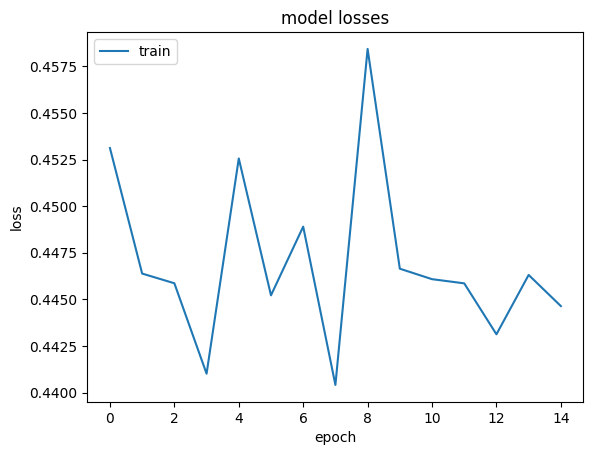

In [164]:
mplot.plot(model.history.history['loss'])
mplot.title('model losses')
mplot.ylabel('loss')
mplot.xlabel('epoch')
mplot.legend(['train', 'test'], loc='upper left')
mplot.show()

In [141]:
def kick(foot, direction):
  shot = pd.DataFrame({'foot_used': [foot], 'direction_of_shot': [direction]})
  shot_enc = encoding(shot)
  return np.array(shot_enc)

In [144]:
def predictions():
  foot = ['right', 'left']
  direction = ['top-left', 'top-right', 'bottom-left', 'bottom-right', 'center']
  lf = []
  rf = []
  for i in direction:
    rf.append({(foot[0], i):model.predict(kick(foot[0], i))})
    lf.append({(foot[1], i):model.predict(kick(foot[1], i))})
  return lf, rf

td, kl = predictions()
for i in kl:
  print(f'right-foot:{i}')
for i in td:
  print(f'left-foot:{i}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
right-foot:{('right', 'top-left'): array([[0.7858874]], dtype=float32)}
right-foot:{('right', 'top-right'): array([[0.77926815]], dtype=float32)}
right-foot:{('right', 'bottom-left'): array([[0.7731908]], dtype=float32)}
right-foot:{('right', 'bottom-right'): array([[0.76978314]], dtype=float32)}
right-foot:{('right', 'center'): array([[0.7692917]], dtype=float32)}
left-foot:{('left', 'top-left'): array([[0.8071362]], dtype=float32)}
left-foot:{('left', 'top-right'): array([[0.80183583]], dtype=float32)}
left-foot:{('left', 'bottom-left'): array([[0.79622304]], dtype=float32)}
left-foot:{('left', 'bottom-right'):